# Анализ бизнес-показателей. Проектная работа

# Описание проекта
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
<br> Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.
<br> Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# Описание данных
В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.
<br> Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.
<br> Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.
<br> Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

## Загрузите данные и подготовьте их к анализу

### Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# Пути к файлам
# /datasets/visits_info_short.csv. Скачать датасет;
# /datasets/orders_info_short.csv. Скачать датасет;
# /datasets/costs_info_short.csv. Скачать датасет.
try:
    visits, orders, costs = (pd.read_csv('visits_info_short.csv'),
                             pd.read_csv('orders_info_short.csv'),
                             pd.read_csv('costs_info_short.csv'))
except:
    visits, orders, costs = (pd.read_csv('/datasets/visits_info_short.csv'),
                             pd.read_csv('/datasets/orders_info_short.csv'),
                             pd.read_csv('/datasets/costs_info_short.csv'))

### Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [3]:
# Изучаем visits
visits.info()
display(visits.head())
print('Кол-во явных дубликатов:',visits.duplicated().sum())
print('Уникальные значения столбцов:')
for i in visits.columns[1:4]:
    print(visits[i].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Кол-во явных дубликатов: 0
Уникальные значения столбцов:
['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


В данных о посещениях нет пропусков и дубликатов. Нужно лишь привести названия столбцов к единому формату и преобразовать типы данных.

In [4]:
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')
visits[visits.columns[4]] = pd.to_datetime(visits[visits.columns[4]])
visits[visits.columns[5]] = pd.to_datetime(visits[visits.columns[5]])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [5]:
# Изучаем orders
orders.info()
display(orders.head())
print('Кол-во явных дубликатов:',orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Кол-во явных дубликатов: 0


В данных о заказах нет пропусков и дубликатов. Нужно лишь привести названия столбцов к единому формату и преобразовать типы данных.

In [6]:
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ', '_')
orders[orders.columns[1]] = pd.to_datetime(orders[orders.columns[1]])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [7]:
# Изучаем costs
costs.info()
display(costs.head())
print('Кол-во явных дубликатов:',costs.duplicated().sum())
print('Уникальные значения столбцов:')
print(costs[costs.columns[1]].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Кол-во явных дубликатов: 0
Уникальные значения столбцов:
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


В данных о расходах на рекламу нет пропусков и дубликатов. Нужно лишь привести названия столбцов к единому формату и преобразовать типы данных.

In [8]:
costs.columns = costs.columns.str.lower()
costs.columns = costs.columns.str.replace(' ', '_')
costs[costs.columns[0]] = pd.to_datetime(costs[costs.columns[0]]).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Предобработка данных выполнена.

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.
Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.
<br>Это функции для вычисления значений метрик:
- get_profiles() — для создания профилей пользователей,
- get_retention() — для подсчёта Retention Rate,
- get_conversion() — для подсчёта конверсии,
- get_ltv() — для подсчёта LTV.
<br>А также функции для построения графиков:
- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.

### get_profiles() — для создания профилей пользователей

In [9]:
# функция для создания пользовательских профилей (Без events)

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### get_retention() — для подсчёта Retention Rate

In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### get_conversion() — для подсчёта конверсии

In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### get_ltv() — для подсчёта LTV

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### filter_data() — для сглаживания данных

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### plot_retention() — для построения графика Retention Rate

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### plot_conversion() — для построения графика конверсии

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### plot_ltv_roi — для визуализации LTV и ROI

In [16]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных
### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.


In [17]:
profiles = get_profiles(visits, orders, costs)
profiles.info()
profiles.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [18]:
# мин дата привлечения
min_acq_date = profiles['first_ts'].min()
min_acq_date

Timestamp('2019-05-01 00:00:41')

In [19]:
# макс дата привлечения
max_acq_date = profiles['first_ts'].max()
max_acq_date

Timestamp('2019-10-27 23:59:04')

150 тыс. уникальных пользователей были привлечены с 1 мая по 27 октября, **что соответствует условиям проекта.**

### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.


In [20]:
reg_us = profiles.groupby('region').agg({'user_id':'count','payer':'sum'}).sort_values(by='user_id')
reg_us['perc'] = reg_us['payer']/reg_us['user_id']*100
reg_us

,user_id,payer,perc
region,,,
Germany,14981,616,4.111875
France,17450,663,3.799427
UK,17575,700,3.982930
United States,100002,6902,6.901862


Пользователи привлекались из 4х стран. Наибольшее кол-во (2/3) из США. Там же наибольшее кол-во платящих - 6,9%.

### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.


In [21]:
dev_us = profiles.groupby('device').agg({'user_id':'count','payer':'sum'}).sort_values(by='user_id')
dev_us['perc'] = dev_us['payer']/dev_us['user_id']*100
dev_us

,user_id,payer,perc
device,,,
Mac,30042,1912,6.364423
PC,30455,1537,5.046790
Android,35032,2050,5.851793
iPhone,54479,3382,6.207897


Чуть больше трети пользователей используют iPhone. Платящие пользователи распределены равномерно.

### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


In [22]:
chan_us = profiles.groupby('channel').agg({'user_id':'count','payer':'sum'}).sort_values(by='user_id')
chan_us['perc'] = chan_us['payer']/chan_us['user_id']*100
chan_us

,user_id,payer,perc
channel,,,
lambdaMediaAds,2149,225,10.469986
AdNonSense,3880,440,11.340206
YRabbit,4312,165,3.826531
MediaTornado,4364,156,3.574702
RocketSuperAds,4448,352,7.913669
LeapBob,8553,262,3.063253
WahooNetBanner,8553,453,5.296387
OppleCreativeMedia,8605,233,2.707728
TipTop,19561,1878,9.600736


37% огранических пользователей, 19% из FaceBoom, 13% из TipTop. Больше всего платящих пользователей привлёкли FaceBoom(12%), AdNonSense(11%), lambdaMediaAds(10%), TipTop(9%).

### После каждого пункта сформулируйте выводы.

## Маркетинг
### Посчитайте общую сумму расходов на маркетинг.


In [23]:
costs['costs'].sum()

105497.30000000002

Общая сумма расходов на маркетинг 105,5 тыс.

### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.


In [24]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs')

,costs
channel,
YRabbit,944.22
MediaTornado,954.48
lambdaMediaAds,1557.60
LeapBob,1797.60
RocketSuperAds,1833.00
OppleCreativeMedia,2151.25
AdNonSense,3911.25
WahooNetBanner,5151.00
FaceBoom,32445.60


Больше всего потратили на TipTop - 54,7 тыс. и FaceBoom - 32,4 тыс. Из этих же источников пришло больше всего пользователей (Не считая organic).
Меньше всего потратили на YRabbit и MediaTornado - 0,9 тыс. Из этих источников пришло меньше всего пользователей (Не считая lambdaMediaAds и AdNonSense, от которых наибольший процент платящих пользователей). 

### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.


<AxesSubplot:xlabel='month,week'>

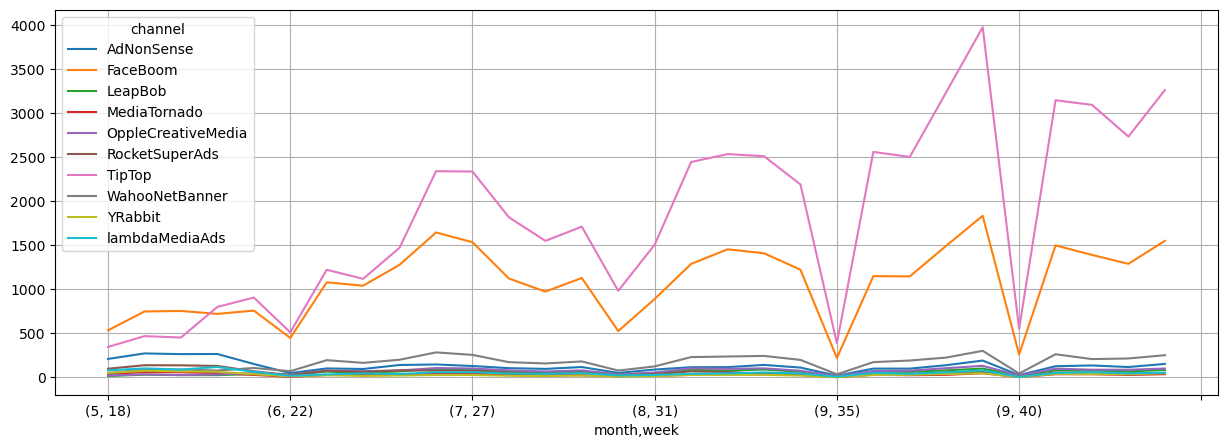

In [25]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs.pivot_table(index='channel',columns=['month','week'],values='costs',aggfunc='sum').T.plot(figsize=(15,5),grid=True)

Расходы постепенно увеличивались для FaceBoom и TipTop. Для остальных источников расходы более-менее стабильны.

### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.


In [26]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles, orders, max_acq_date, 1, dimensions=['channel'], ignore_horizon=True)
roi_grouped.sort_values(by='cac')

C:\Users\User\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,cohort_size,cac,0.0
channel,,,
LeapBob,8553,0.210172,0.529745
MediaTornado,4364,0.218717,0.636818
YRabbit,4312,0.218975,0.762280
OppleCreativeMedia,8605,0.250000,0.402687
RocketSuperAds,4448,0.412095,0.505887
WahooNetBanner,8553,0.602245,0.320501
lambdaMediaAds,2149,0.724802,0.613951
AdNonSense,3880,1.008054,0.507354
FaceBoom,29144,1.113286,0.525981


В среднем, дороже всего обошлось привлечение пользователей из TipTop. Дешевле всего из LeapBob, MediaTornado, YRabbit.

### Напишите промежуточные выводы.

У источников с самым большим CAC (TipTop, FaceBoom, AdNonSense, lambdaMediaAds) наибольший процент платящих пользователей (9.6%, 12.2%, 11.3%, 10.4%).

## Оцените окупаемость рекламы
Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.


### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.


In [27]:
observation_date = datetime(2019, 11, 1).date()
horizon = 14

In [28]:
visits = visits[visits['channel']!='organic']
profiles = get_profiles(visits, orders, costs)

In [29]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles, orders, observation_date, horizon, dimensions=[], ignore_horizon=False)

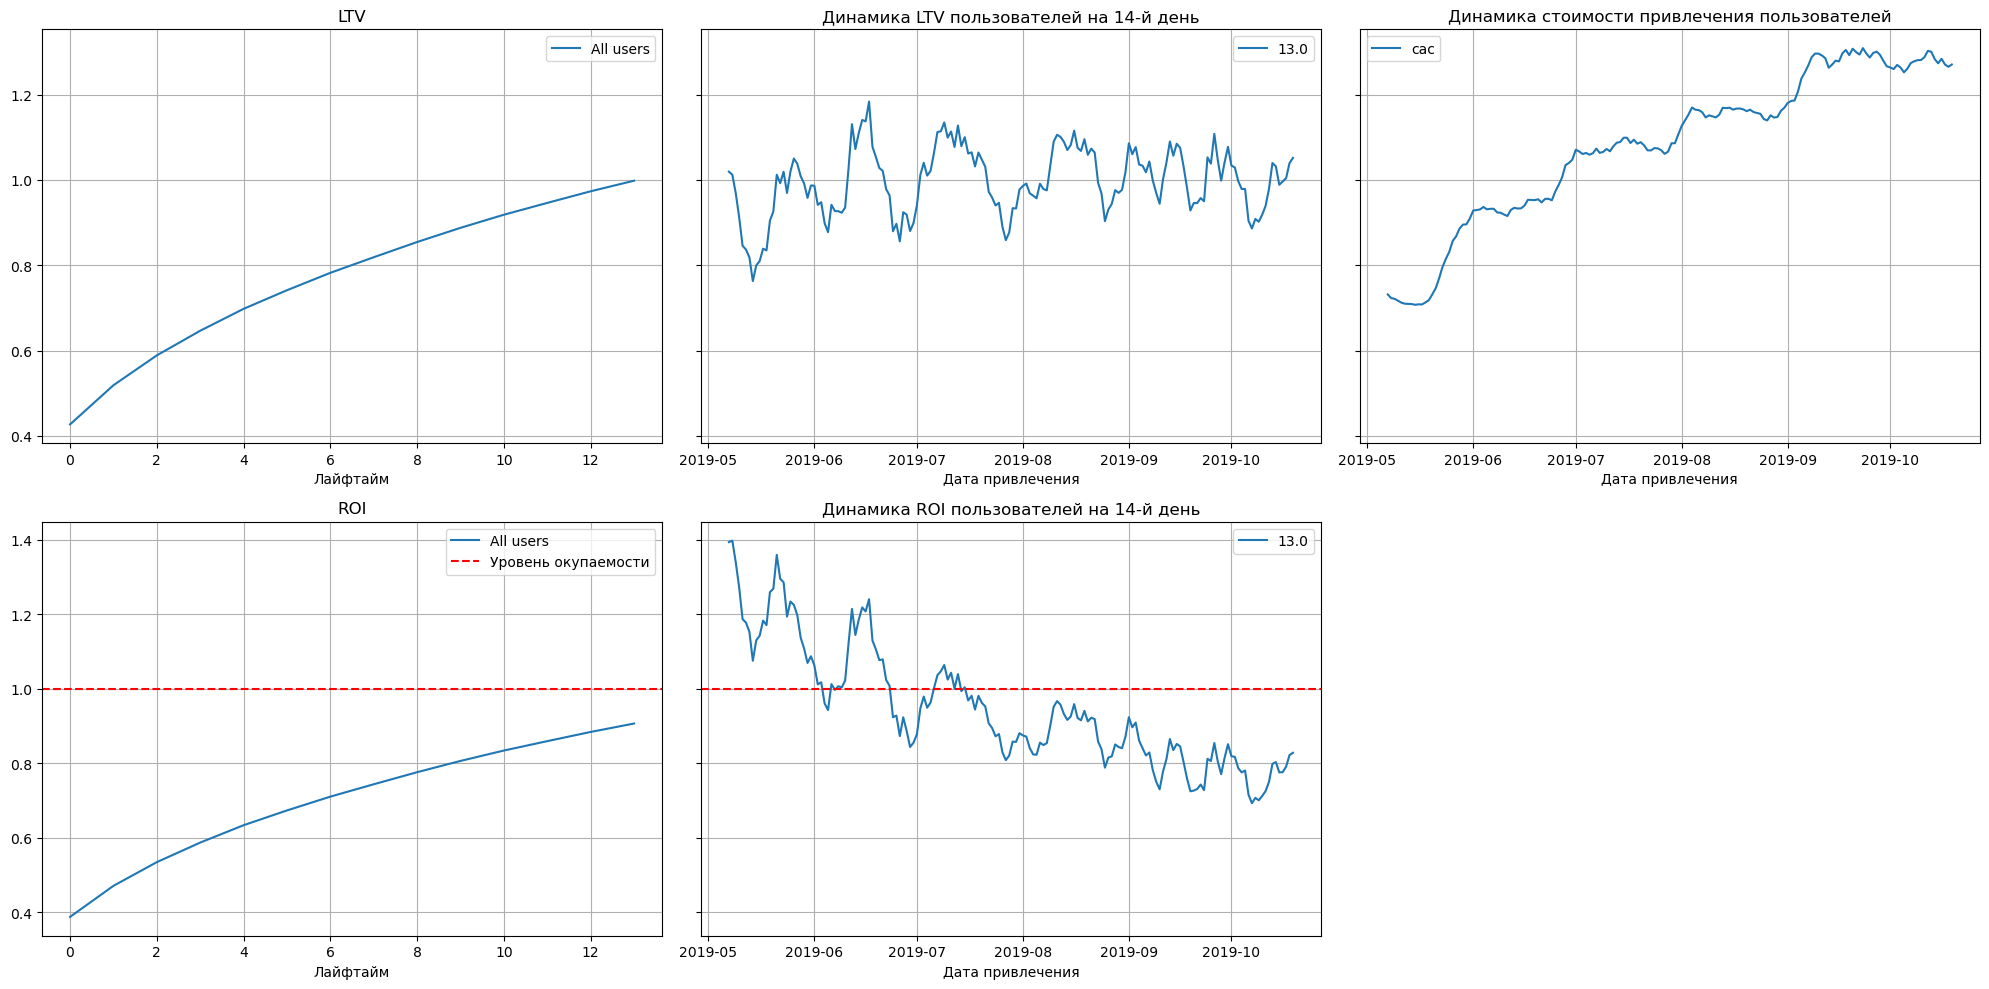

In [30]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon, window=7)

**Реклама не окупается, ROI спустя две недели около 90%. Стоимость привлечения растет, CAC увеличивается каждый месяц.**

### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.


In [31]:
conversion_result_raw, conversion_result_grouped, conversion_result_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon,
    dimensions=[],
    ignore_horizon=False,
)

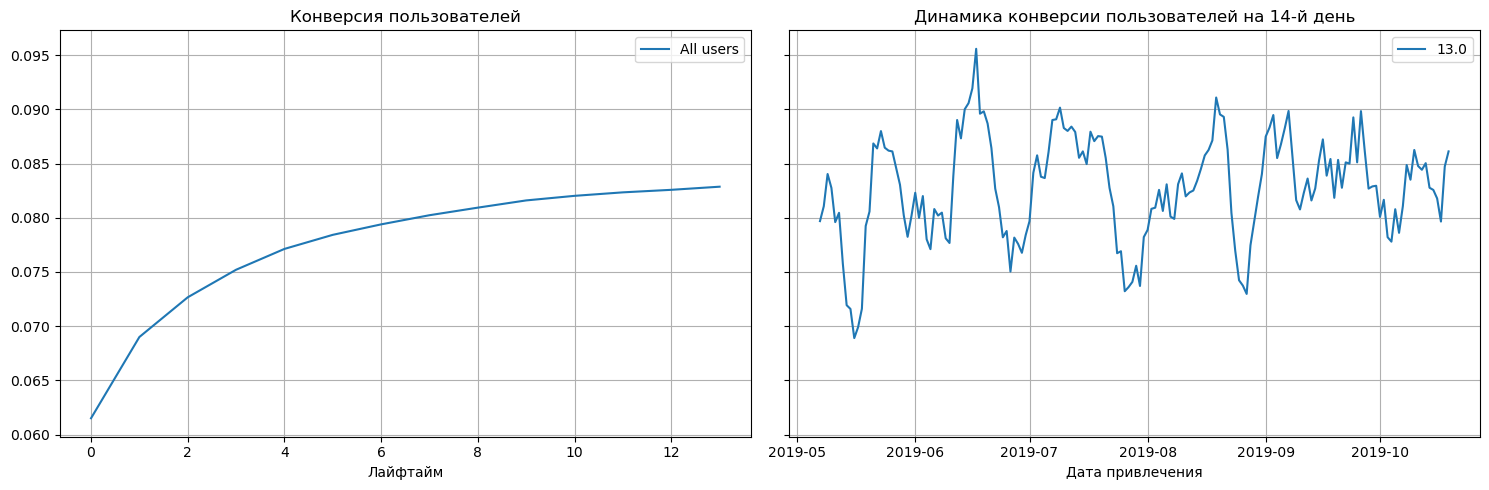

In [32]:
plot_conversion(conversion_result_grouped, conversion_result_in_time, horizon, window=7)

In [33]:
retention_result_raw, retention_result_grouped, retention_result_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon,
    dimensions=[],
    ignore_horizon=False,
)

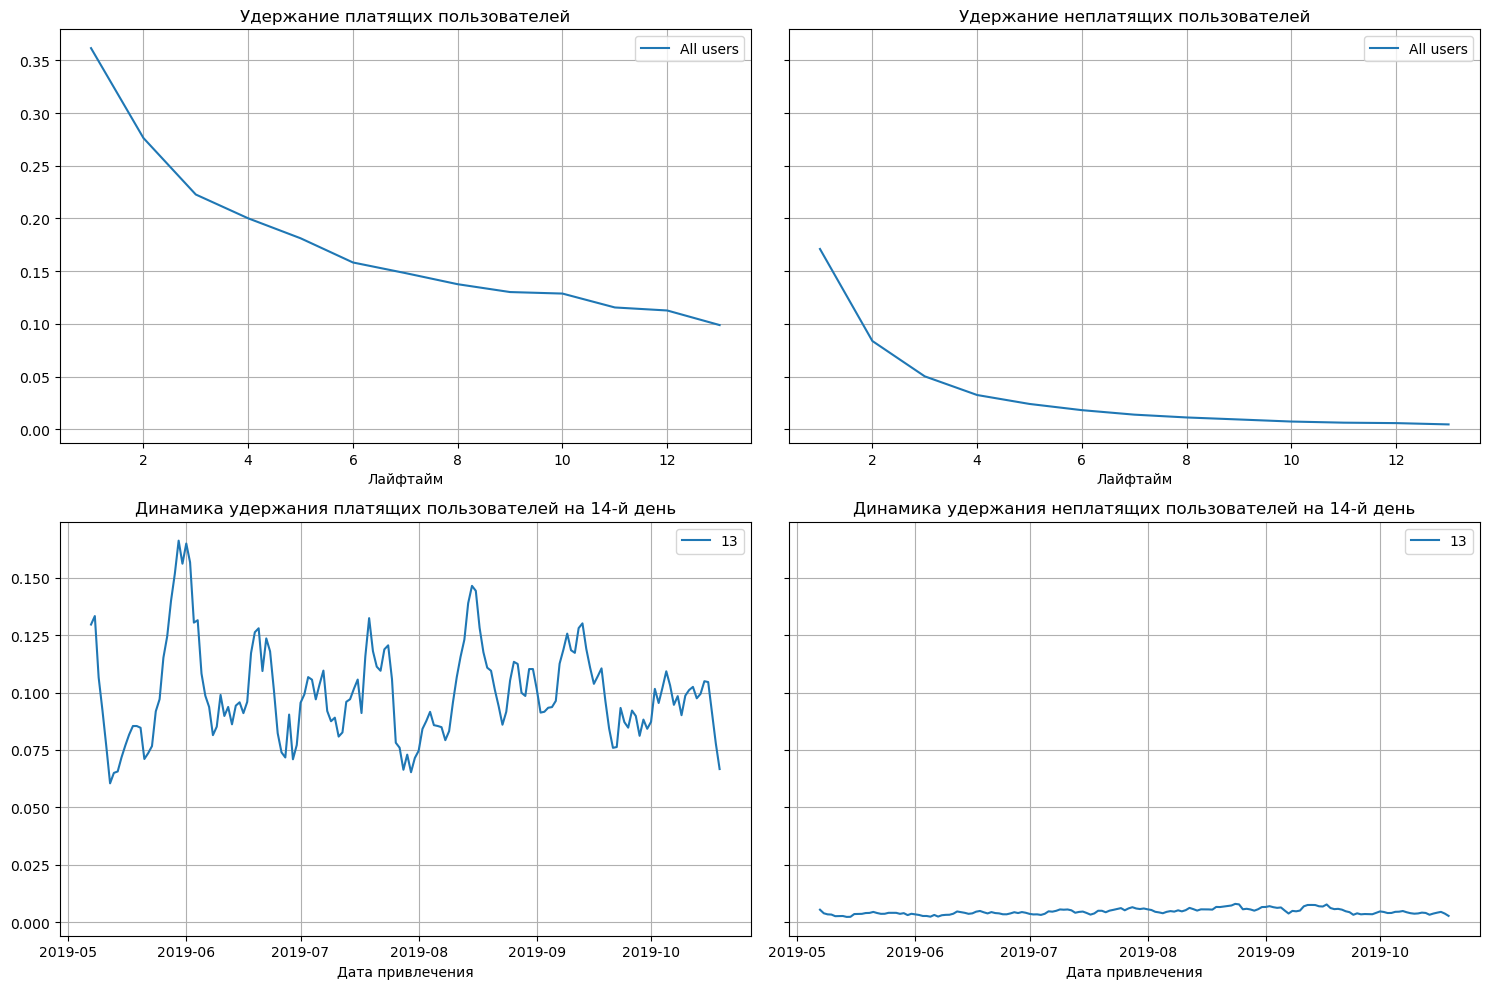

In [34]:
plot_retention(retention_result_grouped, retention_result_in_time, horizon, window=7)

**Конверсия стабильная, разброс от 7 до 9.5 процентов. Удержание низкое, около 10 процентов.**

### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


In [35]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles, orders, observation_date, horizon, dimensions=['device'], ignore_horizon=False)

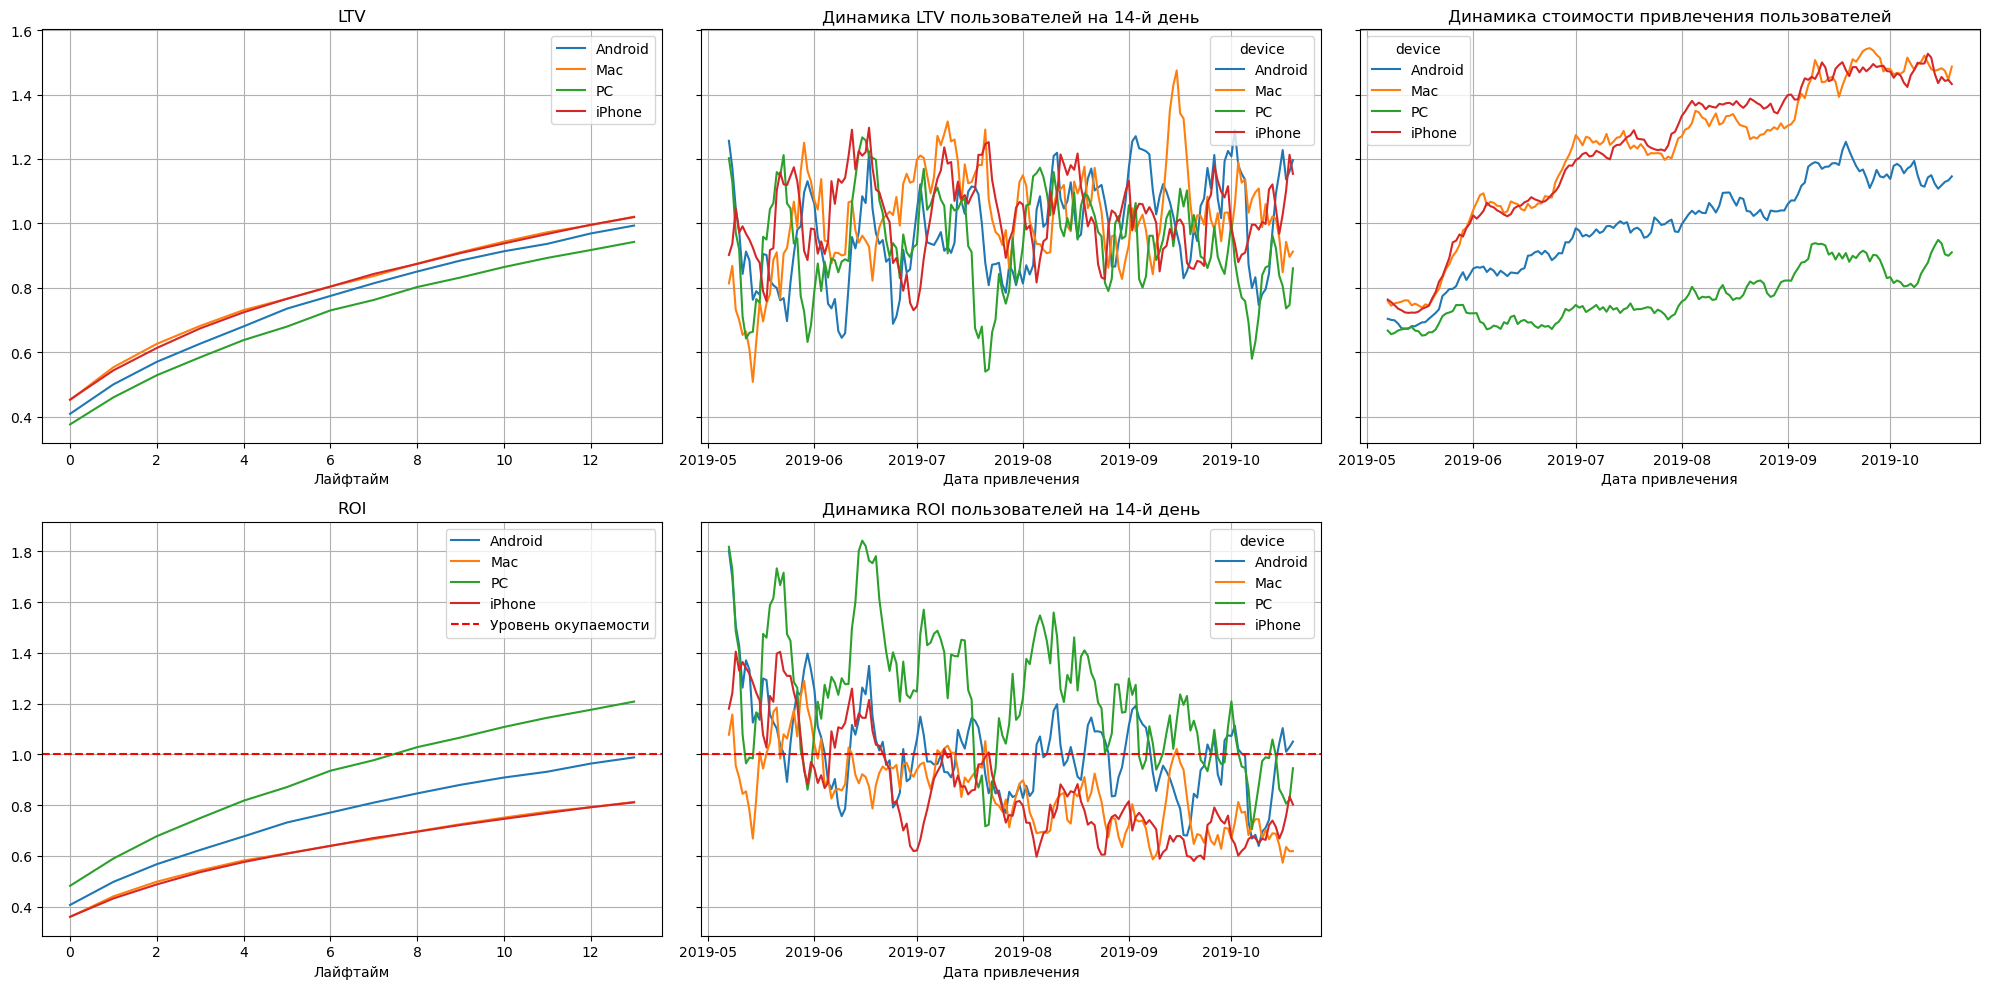

In [36]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon, window=7)

**Реклама окупается только для устройств PC, но динамика показывает постепенное снижение для всех устройств.**

### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


In [37]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles, orders, observation_date, horizon, dimensions=['region'], ignore_horizon=False)

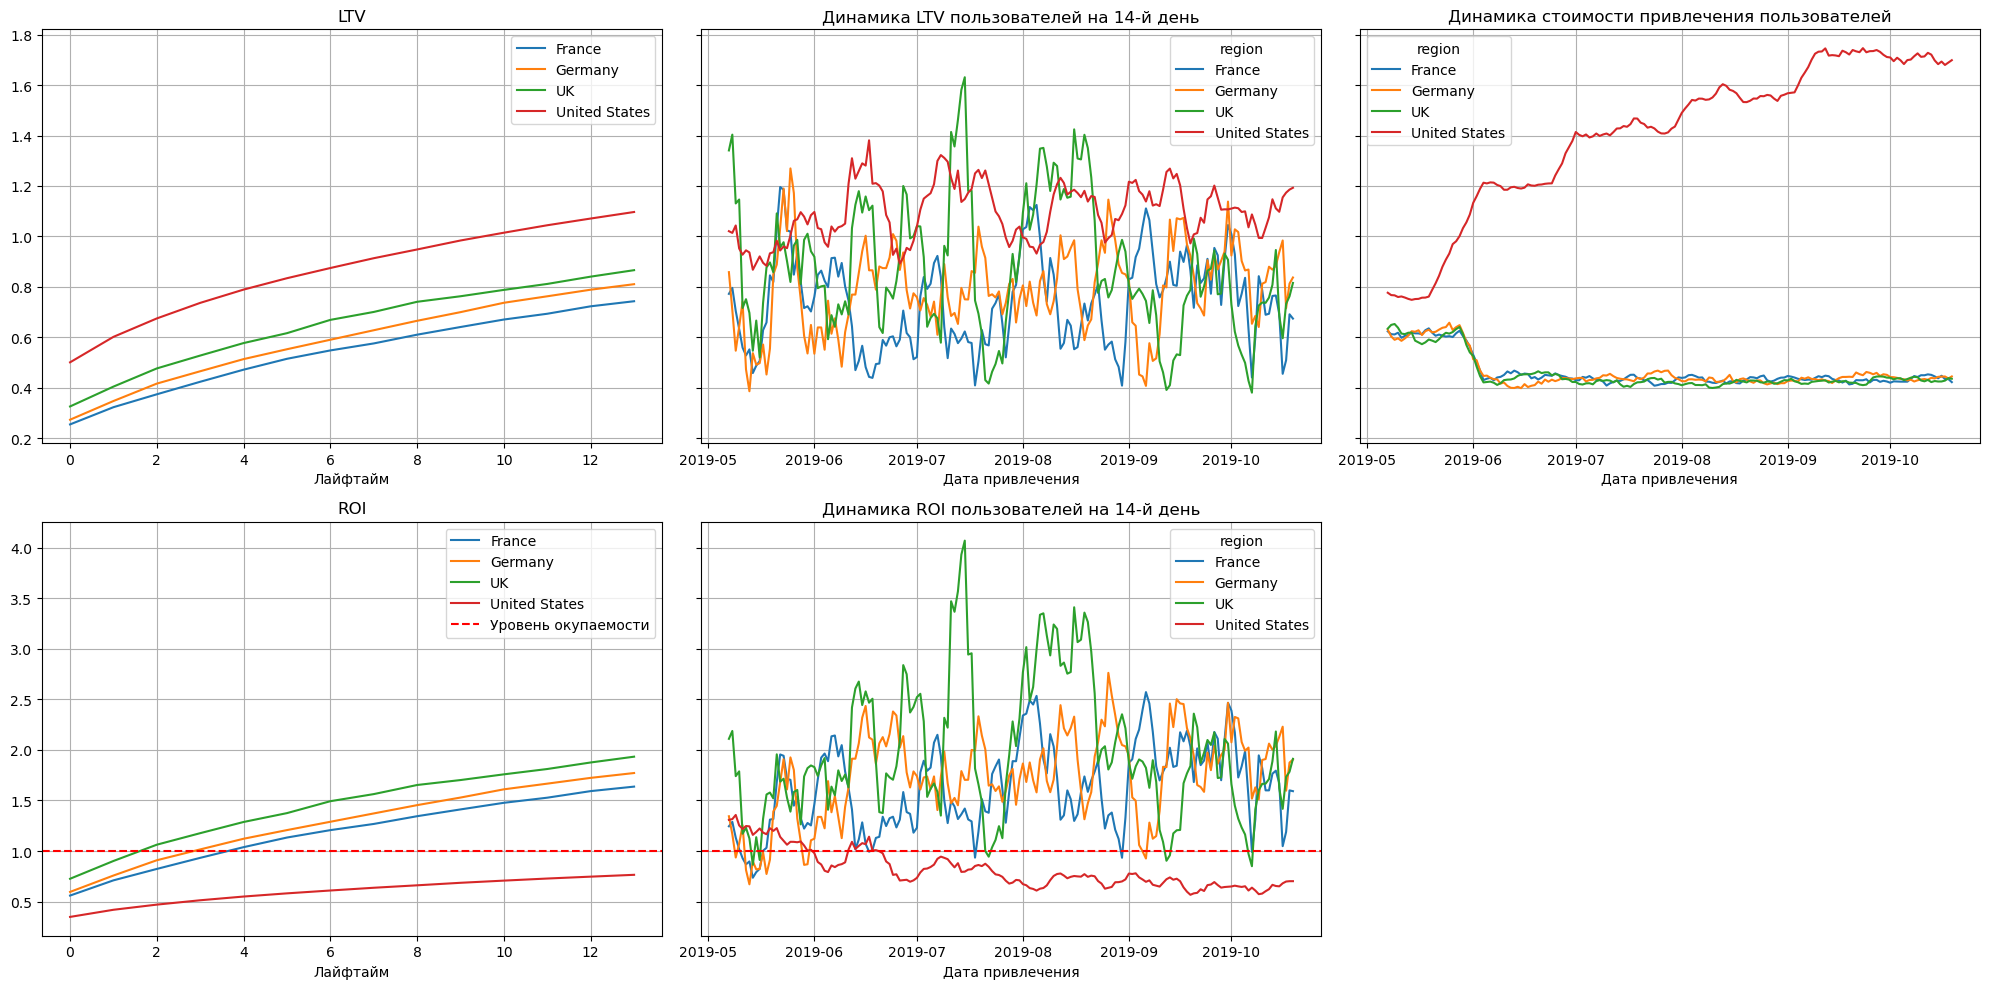

In [38]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon, window=7)

**Пользователи из США хорошо и стабильно монетизируются, но с июня не перебивают затраты на привлечение. С середины мая наблюдается увеличение трат на рекламу в регионе United States и уменьшение для остальных регионов.**

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


In [39]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles, orders, observation_date, horizon, dimensions=['channel'], ignore_horizon=False)

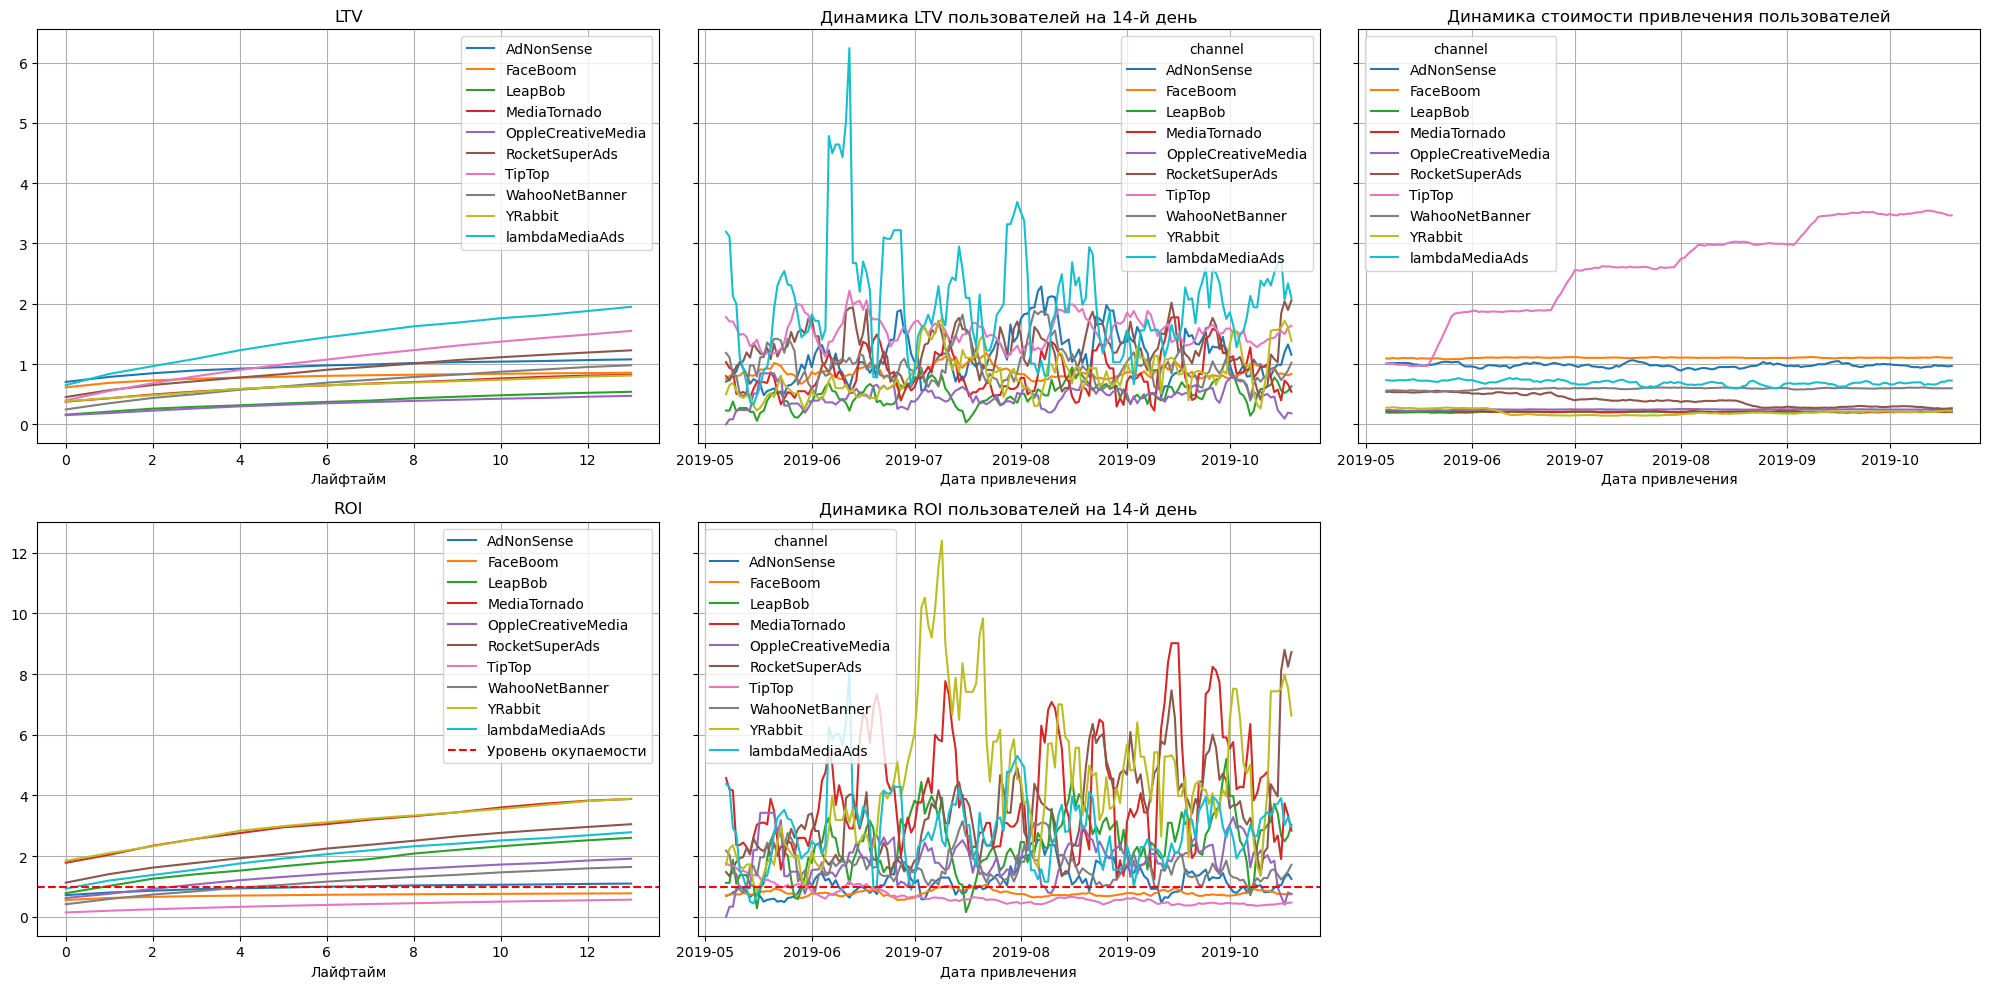

In [40]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon, window=7)

**LambdaMediaAds стабильно привлекает платящих пользователей. С середины мая растёт CAC из TipTop.**

### Ответьте на такие вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?


Реклама окупается уже через неделю по всем источникам, кроме AdNonSense, FaceBoom, TipTop. За счёт этих трёх доходы не превышают расходы. Реклама не окупается в целом. Негативное влияния, судя по графикам, оказывают американские пользователи iPhone и Mac. Думаю, проблема может быть в неправильно выбранной рекламной стратегии. Исследуем более подробно конверсию и удержание.

In [41]:
conversion_result_raw, conversion_result_grouped, conversion_result_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon,
    dimensions=['channel'],
    ignore_horizon=False,
)

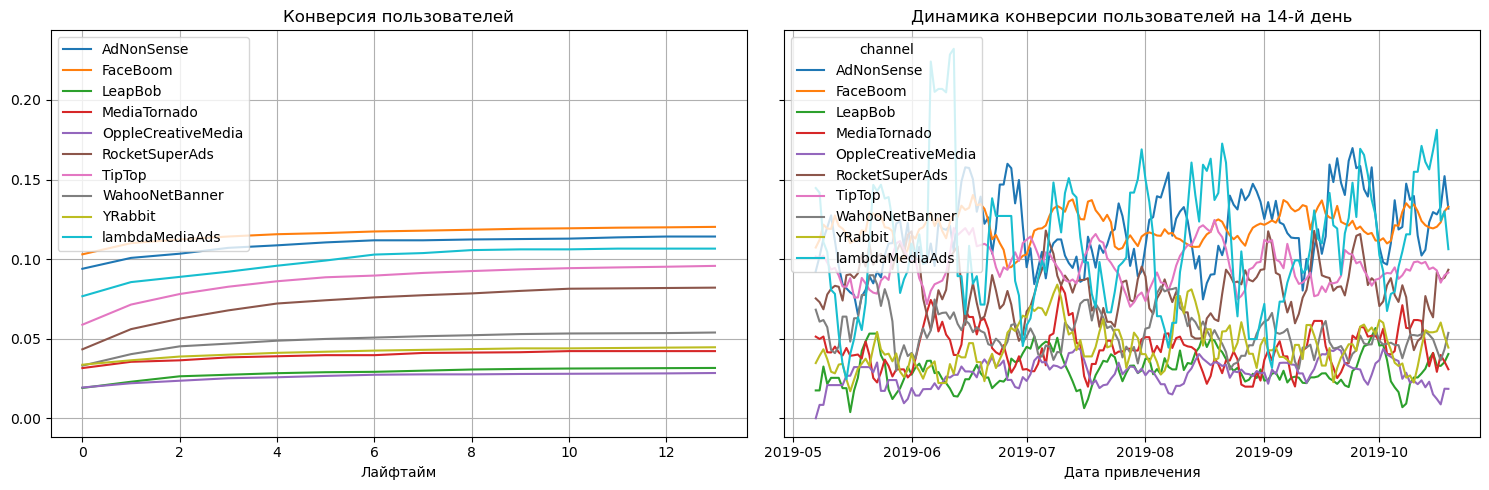

In [42]:
plot_conversion(conversion_result_grouped, conversion_result_in_time, horizon, window=7)

In [43]:
retention_result_raw, retention_result_grouped, retention_result_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon,
    dimensions=['channel'],
    ignore_horizon=False,
)

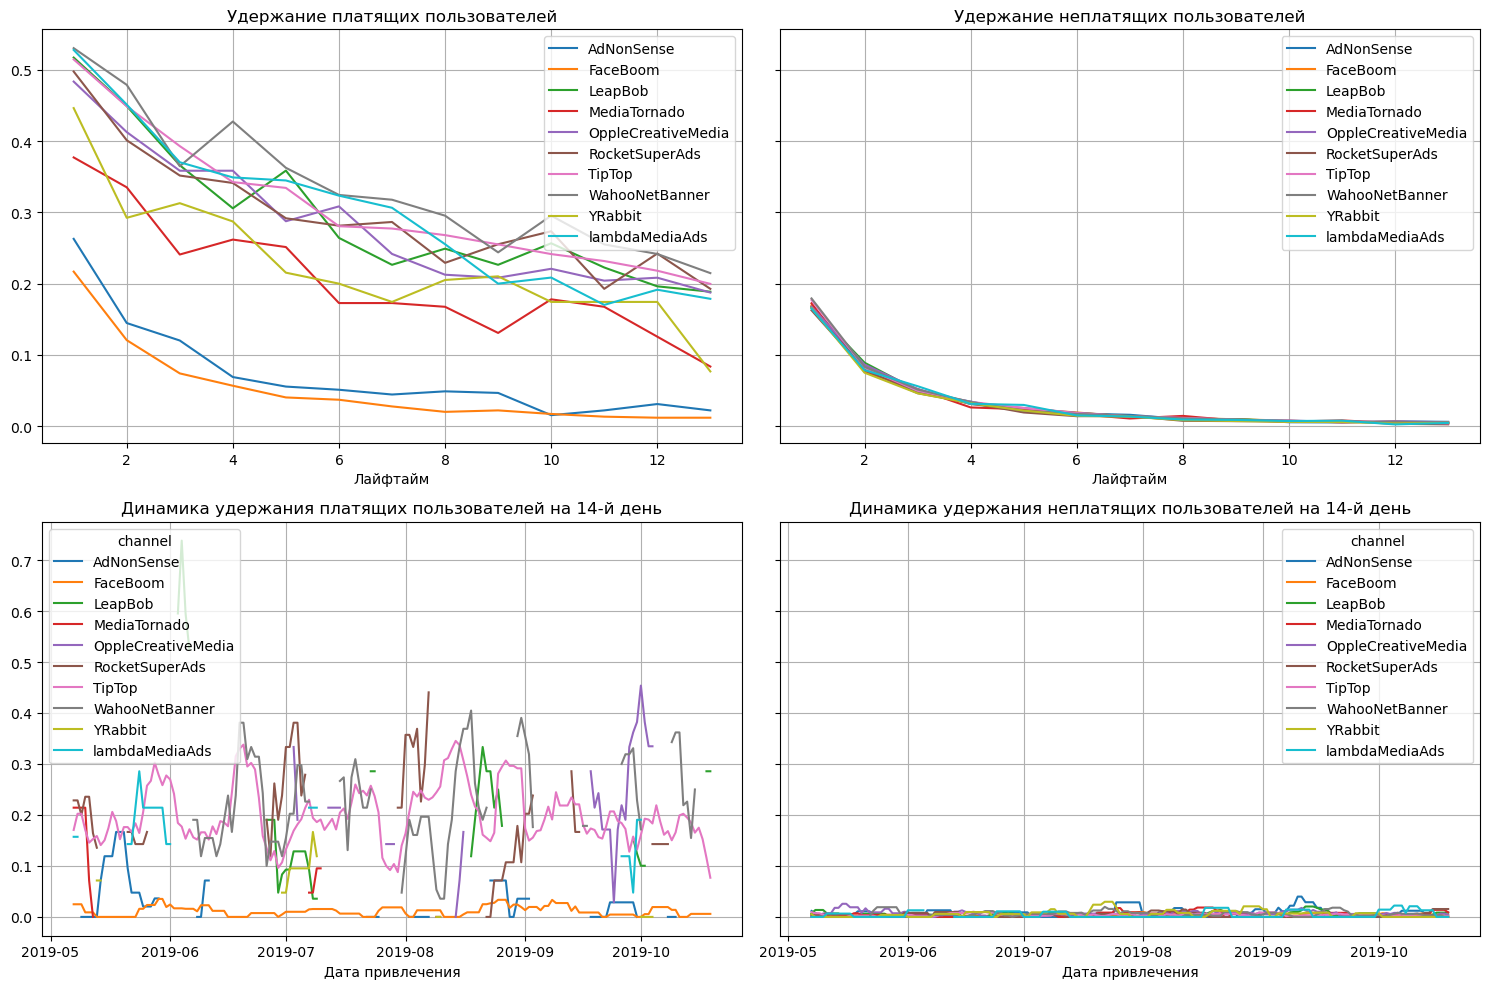

In [44]:
plot_retention(retention_result_grouped, retention_result_in_time, horizon, window=7)

**У FaceBoom хорошая конверсия, но плохое удержание.**

### Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

На мой взгляд, увеличение рекламного бюджета не принесло желаемого результата. Кажется, расчет был на пользователей United States из-за их высокой конверсии, что привело к большим рекламным кампаниям в регионе, но привлеченные пользователи не удерживались в приложении и расходы оказались больше доходов. Возможно, стоило бы более равномерно разделить расходы по рекламным источникам, вместо того, что бы тратить большую часть средств на пару популярных каналов.

## Напишите выводы
Выделите причины неэффективности привлечения пользователей.
Сформулируйте рекомендации для отдела маркетинга.

Были исследованы данные о привлеченных пользователях за период 1 мая - 27 октября 2019 года. Проанализированы траты на рекламу по разным источникам для 4 типов устройств, для пользователей из 4 регионов. Построены таблицы удержания и конверсии пользователей, графики LTV, CAC, ROI.
Из общей суммы расходов на маркетинг (105,5 тыс) 87 тыс (82%) потрачено на 2 канала из 10, что по моему мнению нецелесообразно. Разумнее было бы распределить рекламный бюджет более равномерно. Также можно более детально исследовать другие источники, например, перспективным источником является lambdaMediaAds, которые показывают хорошие, стабильные результаты по конверсии (10%).

**Нужно улучшить удержание пользователей из FaceBoom. Как это сделать? Осмелюсь предположить, что, возможно, из-за большого объёма различных новостей/реклам/прочих ивентов в источнике, пользователи теряют фокус на приложение и просто забывают туда заходить. Стоит попробовать добавить повторную рассылку рекламы для уже привлечённых пользователей через определённый промежуток времени.**